In [ ]:
!pip install tensorflow keras numpy matplotlib scikit-learn

In [ ]:
!kaggle datasets download -d azouzmaroua/algeria-ultrasound-images-thyroid-dataset-auitd
!unzip /content/algeria-ultrasound-images-thyroid-dataset-auitd.zip

Dataset URL: https://www.kaggle.com/datasets/azouzmaroua/algeria-ultrasound-images-thyroid-dataset-auitd
License(s): unknown
 98% 101M/103M [00:02<00:00, 72.2MB/s] 
100% 103M/103M [00:02<00:00, 47.6MB/s]
Archive:  /content/algeria-ultrasound-images-thyroid-dataset-auitd.zip
  inflating: dataset thyroid/test/Benign/2_0.jpg  
  inflating: dataset thyroid/test/Benign/2_1.jpg  
  inflating: dataset thyroid/test/Benign/2_10.jpg  
  inflating: dataset thyroid/test/Benign/2_11.jpg  
  inflating: dataset thyroid/test/Benign/2_12.jpg  
  inflating: dataset thyroid/test/Benign/2_13.jpg  
  inflating: dataset thyroid/test/Benign/2_14.jpg  
  inflating: dataset thyroid/test/Benign/2_15.jpg  
  inflating: dataset thyroid/test/Benign/2_16.jpg  
  inflating: dataset thyroid/test/Benign/2_17.jpg  
  inflating: dataset thyroid/test/Benign/2_18.jpg  
  inflating: dataset thyroid/test/Benign/2_19.jpg  
  inflating: dataset thyroid/test/Benign/2_2.jpg  
  inflating: dataset thyroid/test/Benign/2_20.jpg  


In [ ]:
# !rm -rf /content/thyroid/

In [ ]:
# !rm -rf '/content/dataset thyroid'

In [ ]:
import os


file_path = "/content/dataset thyroid/"
new_path = "/content/thyroid/"

if not os.path.exists(new_path):
    os.makedirs(new_path)
    print(f"The folder '{new_path}' has been created.")
else:
    print(f"The folder '{new_path}' already exists.")

for i in os.listdir(file_path):
  new_path_file = new_path+i
  if not os.path.exists(new_path_file):
    os.makedirs(new_path_file)
    new_path_file = new_path_file+"/"+"images"
    if not os.path.exists(new_path_file):
      os.makedirs(new_path_file)
  for j in os.listdir(file_path+"/"+i):
    if not os.path.exists(new_path_file+"/"+j):
      os.makedirs(new_path_file+"/"+j)

    for k in os.listdir(file_path+"/"+i+"/"+j):
      if not os.path.exists(new_path_file+"/"+j+"/"+k) and os.path.isdir(file_path+"/"+i+"/"+j+"/"+k):
        for kk in os.listdir(file_path+"/"+i+"/"+j+"/"+k):
          os.rename(file_path+"/"+i+"/"+j+"/"+k+"/"+kk, new_path_file+"/"+j+"/"+kk)
      else:
        os.rename(file_path+"/"+i+"/"+j+"/"+k, new_path_file+"/"+j+"/"+k)

The folder '/content/thyroid/' has been created.


In [ ]:
import cv2
import numpy as np
import os

# Function to create masks from images
def create_masks(input_dir):
    # Define subdirectories for train and test
    train_input_dir = os.path.join(input_dir, 'train','images')
    test_input_dir = os.path.join(input_dir, 'test','images')

    print(train_input_dir)
    print(test_input_dir)

    # Define output directories for masks
    train_output_dir = os.path.join(input_dir, 'train', 'masks')
    test_output_dir = os.path.join(input_dir, 'test', 'masks')

    print(train_output_dir)
    print(test_output_dir)

    # Create mask directories if they do not exist
    os.makedirs(train_output_dir, exist_ok=True)
    os.makedirs(test_output_dir, exist_ok=True)

    print("Mask directories created.")
    print(os.listdir(train_input_dir))
    print(os.path.join(train_input_dir, "masks"))

    # Function to process each category
    def process_category(category, category_path, mask_subdir):
        os.makedirs(mask_subdir, exist_ok=True)  # Create subfolder for masks
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            image = cv2.imread(img_path)

            # Check if the image was loaded properly
            if image is None:
                print(f"Could not read image: {img_path}")
                continue


            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Thresholding to create a binary mask
            threshold = 128
            binary_mask = (gray > threshold) * 255  # Create a binary mask
            binary_mask = binary_mask.astype(np.uint8)  # Convert to uint8

            # Save the binary mask
            mask_path = os.path.join(mask_subdir, img_name)
            cv2.imwrite(mask_path, binary_mask)
            # Convert to grayscale
            # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # # Thresholding to create a binary mask (adjust the value as necessary)
            # _, mask = cv2.threshold(gray, 119, 255, cv2.THRESH_BINARY)

            # # Optionally, apply morphological operations
            # kernel = np.ones((5, 5), np.uint8)
            # mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)

            # # Save the mask
            # mask_path = os.path.join(mask_subdir, img_name)
            # cv2.imwrite(mask_path, mask)

    # Process training categories
    if os.path.exists(train_input_dir):
        for category in os.listdir(train_input_dir):
            category_path = os.path.join(train_input_dir, category)
            if os.path.isdir(category_path):
                mask_subdir = os.path.join(train_output_dir, category)
                process_category(category, category_path, mask_subdir)
    else:
        print(f"Training directory does not exist: {train_input_dir}")

    # Process test categories
    if os.path.exists(test_input_dir):
        for category in os.listdir(test_input_dir):
            category_path = os.path.join(test_input_dir, category)
            if os.path.isdir(category_path):
                mask_subdir = os.path.join(test_output_dir, category)
                process_category(category, category_path, mask_subdir)
    else:
        print(f"Test directory does not exist: {test_input_dir}")


# Main execution
if __name__ == "__main__":
    # Specify the main directory path
    main_directory = '/content/thyroid'  # Change this to your specific path
    create_masks(main_directory)
    print("Masks have been created for all images in the training and test sets.")


/content/thyroid/train/images
/content/thyroid/test/images
/content/thyroid/train/masks
/content/thyroid/test/masks
Mask directories created.
['Malignant', 'benign', 'normal thyroid']
/content/thyroid/train/images/masks
Masks have been created for all images in the training and test sets.


In [ ]:
!sudo apt install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (109 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 123621 files and directories currently install

In [ ]:
!tree -d

.
├── dataset thyroid
│   ├── test
│   │   ├── Benign
│   │   ├── Malignant
│   │   └── normal thyroid
│   └── train
│       ├── benign
│       │   ├── Tiroides2
│       │   └── Tiroides3
│       ├── Malignant
│       │   ├── Tiroides4
│       │   └── Tiroides5
│       └── normal thyroid
├── sample_data
└── thyroid
    ├── test
    │   ├── images
    │   │   ├── Benign
    │   │   ├── Malignant
    │   │   └── normal thyroid
    │   └── masks
    │       ├── Benign
    │       ├── Malignant
    │       └── normal thyroid
    └── train
        ├── images
        │   ├── benign
        │   ├── Malignant
        │   └── normal thyroid
        └── masks
            ├── benign
            ├── Malignant
            └── normal thyroid

33 directories


In [ ]:
import tensorflow as tf
import os

# Function to load an image and its corresponding mask
def load_image_and_mask(image_path, mask_path):
    # Load the image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)  # Change to decode_png if masks are PNGs
    image = tf.image.resize(image, [128, 128])  # Resize as necessary
    image = image / 255.0  # Normalize to [0, 1]

    # Load the mask
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)  # Assuming masks are single-channel
    mask = tf.image.resize(mask, [128, 128])  # Resize as necessary
    mask = mask / 255.0  # Normalize to [0, 1]

    return image, mask

# Load datasets from the specified image and mask directories
def load_dataset(image_dir, mask_dir):
    image_paths = []
    mask_paths = []

    for category in os.listdir(image_dir):
        category_path = os.path.join(image_dir, category)
        mask_subdir = os.path.join(mask_dir, category)
        for img_name in os.listdir(category_path):
            image_paths.append(os.path.join(category_path, img_name))
            mask_paths.append(os.path.join(mask_subdir, img_name))

    print(image_paths)
    print(mask_paths)

    return tf.data.Dataset.from_tensor_slices((image_paths, mask_paths)).map(load_image_and_mask)

# Load train and test datasets
train_dataset = load_dataset('/content/thyroid/train/images', '/content/thyroid/train/masks')
test_dataset = load_dataset('/content/thyroid/test/images', '/content/thyroid/test/masks')

# Batch and shuffle the dataset
train_dataset = train_dataset.shuffle(100).batch(32)  # Adjust batch size as necessary
test_dataset = test_dataset.batch(32)

# U-Net model definition
def unet_model(input_shape):
    inputs = tf.keras.layers.Input(input_shape)

    # Downsampling
    c1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c3 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Upsampling
    u4 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c3)
    u4 = tf.keras.layers.concatenate([u4, c2])
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

    u5 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = tf.keras.layers.concatenate([u5, c1])
    c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u5)
    c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c5)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    return model

# Create the U-Net model
model = unet_model((128, 128, 3))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_dataset, validation_data=test_dataset, epochs=50)  # Adjust epochs as necessary

# Evaluate the model
loss, accuracy = model.evaluate(test_dataset)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Save the model (optional)
model.save('unet_thyroid_model.h5')


['/content/thyroid/train/images/Malignant/4A_49.jpg', '/content/thyroid/train/images/Malignant/tiroides191.jpg', '/content/thyroid/train/images/Malignant/5_6.jpg', '/content/thyroid/train/images/Malignant/tiroides119.jpg', '/content/thyroid/train/images/Malignant/tiroides11 (61).jpg', '/content/thyroid/train/images/Malignant/tiroides159.jpg', '/content/thyroid/train/images/Malignant/tiroides165.jpg', '/content/thyroid/train/images/Malignant/tiroides10.jpg', '/content/thyroid/train/images/Malignant/4B_37.jpg', '/content/thyroid/train/images/Malignant/tiroides23.jpg', '/content/thyroid/train/images/Malignant/5_14.jpg', '/content/thyroid/train/images/Malignant/tiroides196.jpg', '/content/thyroid/train/images/Malignant/tiroides278.jpg', '/content/thyroid/train/images/Malignant/tiroides166.jpg', '/content/thyroid/train/images/Malignant/5_27.jpg', '/content/thyroid/train/images/Malignant/tiroides11 (12).jpg', '/content/thyroid/train/images/Malignant/tiroides67.jpg', '/content/thyroid/train/i

Test Loss: 0.04679742082953453, Test Accuracy: 0.8217377066612244


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


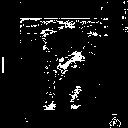

Label: Malignant


In [ ]:
import tensorflow as tf
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload model and image
# uploaded_model = files.upload()
# uploaded_image = files.upload()

# Load the trained model
model = tf.keras.models.load_model('unet_thyroid_model.h5')  # Change filename as necessary

# Function to load and preprocess the user image
def load_and_preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128])
    image = image / 255.0  # Normalize to [0, 1]
    return tf.expand_dims(image, axis=0)  # Add batch dimension

# Function to predict the mask
def predict_mask(model, image_path):
    image = load_and_preprocess_image(image_path)
    prediction = model.predict(image)
    mask = (prediction[0] > 0.5).astype(np.uint8)  # Convert probabilities to binary mask
    return mask

# Updated label function
def label_mask(mask, image_path):
    detected_pixels = np.sum(mask)

    threshold = 100  # Adjust as necessary
    if detected_pixels > threshold:
        if "benign" in image_path.lower():
            return "Benign"
        elif "malignant" in image_path.lower():
            return "Malignant"
        elif "normal thyroid" in image_path.lower():
            return "Normal Thyroid"
    return "No Object Detected"

# Main function to check the output for a user image
def check_user_image(model, image_path):
    # Predict mask
    mask = predict_mask(model, image_path)

    # Labeling
    label = label_mask(mask, image_path)

    # Display the mask and the label
    mask_display = mask.squeeze() * 255  # Convert to 255 scale for display
    mask_display = mask_display.astype(np.uint8)

    # Display the mask
    cv2_imshow(mask_display)

    print(f"Label: {label}")

# Specify the user image path
user_image_path = '/content/thyroid/test/images/Malignant/4A_0.jpg'    # Replace with the actual name of your uploaded image

check_user_image(model, user_image_path)
